# Scripts da aula prática sobre Árvore de decisão, Redes neurais e SVM

## Árvore de decisão

### Prevendo o aparecimento de diabetes com base em medidas de diagnóstico

#### Importando as bibliotecas necessárias
Primeiro vamos importar as bibliotecas que iremos utilizar

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #Divide arrays ou matrizes em conjuntos aleatórios de treino e de teste
from sklearn import metrics #Importa o módulo de métricas para poder calcular a acurácia

#### Carregando a base de dados
Vamos carregar o conjunto de dados necessário usando a função de leitura csv do pandas. 

Mais detalhes sobre a base de dados pode ser encontrado [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
#Carregando a base
pima = pd.read_csv("https://raw.githubusercontent.com/audreyemmely/ciencia-de-dados/main/monitoria/aula_pratica1/dados/pima-indians-diabetes.csv")

In [3]:
pima.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

#### Seleção de features
Aqui, você precisa dividir as colunas fornecidas em dois tipos de variáveis, dependentes (variáveis target) e independentes (variáveis features).

In [4]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pima[features_cols] #Variável feature
y = pima.Outcome #Variável target

#### Dividindo a base em treino e teste
Para entender o desempenho do modelo, dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste é uma boa estratégia.
Vamos dividir a base de dados usando a função ```train_test_split()```. É preciso passar 3 parâmetros: features, target e test_size.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
#70% dos dados são usados para o treinamento e 30% são usados para teste

#### Construindo o modelo de árvore de decisão
Vamos criar o modelo utilizando o scikit-learn

In [6]:
#Criando o objeto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# O parâmetro criterion nos permite escolher a medida de seleção de atributo. 
# Os critérios suportados são “gini” para o índice de Gini e “entropy” para o ganho de informação.

#Treinando
clf = clf.fit(X_train, y_train)

#Prevendo
y_pred = clf.predict(X_test)

#### Avaliando o modelo
Vamos estimar com que acurácia o classificador ou modelo pode prever

A acurácia pode ser calculada comparando os valores reais do conjunto de teste e os valores previstos

In [7]:
# Acurácia do modelo, com que frequência o classificador está correto?
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7705627705627706


Bem, uma taxa de classificação de 77,05% é considerada uma boa acurácia.

#### Visualizando a árvore de decisão


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


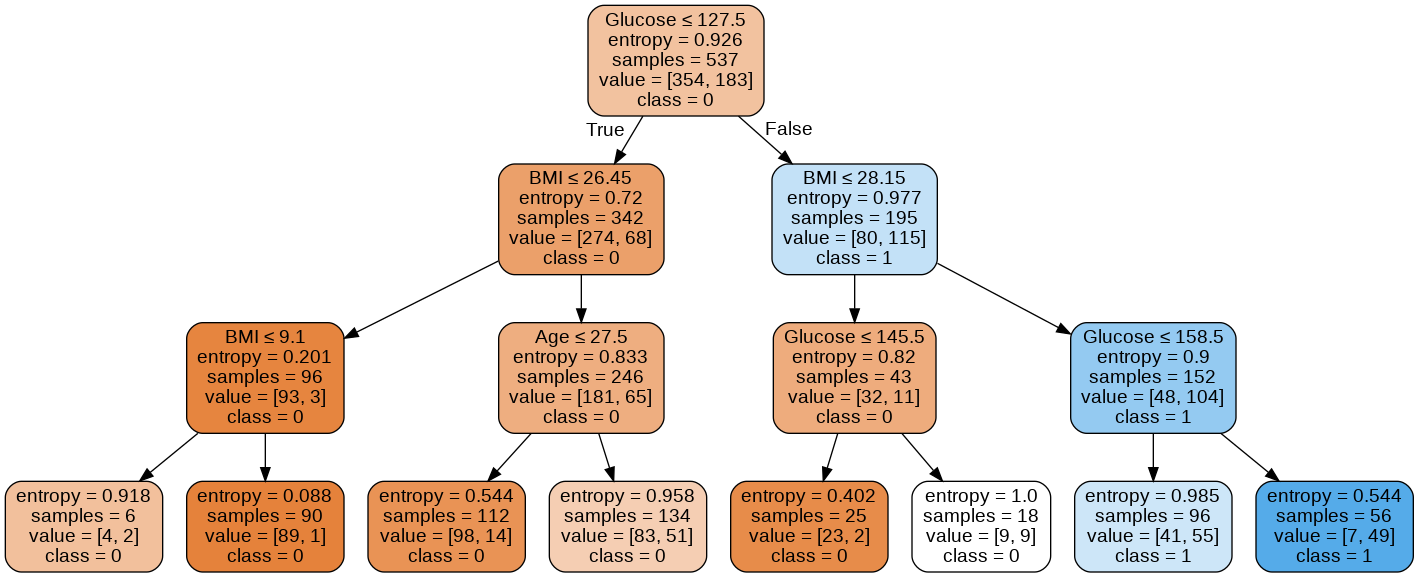

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Redes neurais

### Implementação do Perceptron para classificar as flores no conjunto de dados Íris

Importando a biblioteca numpy para soma e produto de matrizes

In [9]:
import numpy as np

Agora vamos criar a classe perceptron e declarar certos parâmetros como learning rate (para acompanhar as atualizações em pesos), epochs (iterações) e random state, e o construtor é definido para inicializar as variáveis

In [10]:
class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state
  
  #O método fit é para mapear as entradas de dados de treinamento (X) com labels ou targets de treinamento (y). 
  #Duas matrizes são mantidas, uma para atualização de pesos e outra para atualização de erros. 
  #Os pesos são selecionados aleatoriamente e conforme o algoritmo aprende, eles são atualizados com novos valores. 
  #Os erros são mantidos para controlar as classificações erradas. Conforme o algoritmo aprende, os erros serão aprimorados.  
  #Eles são atualizados sempre que houver atualização para o valor de soma. 
  #O erro é calculado usando o learning rate multiplicado pela diferença do valor real menos o valor de predição, e adicionado de volta à matriz de pesos.
  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
    self.errors_ = []
    
    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self
    
  def net_input(self, X):
    z = np.dot(X, self.weights[1:]) + self.weights[0]
    return z

  #A previsão é feita com base no resultado da soma  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, -1)

Agora nosso algoritmo perceptron está pronto na hora de carregarmos um conjunto de dados e verificar as previsões sobre ele

In [11]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

Visualização dos dados 

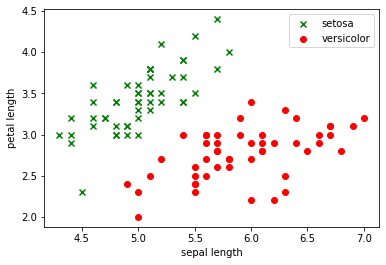

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

Finalmente, a classe perceptron, definida com os parâmetros necessários e o método fit, é chamada

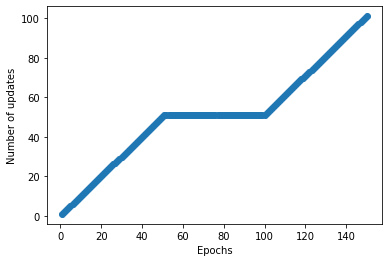

In [13]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Este gráfico mostra a variação do algoritmo de como ele aprendeu com cada epochs.

## Máquinas de vetores de suporte (SVM, support vector machine)

### Prevendo o câncer de mama em pacientes

#### Carregando a base de dados
Vamos primeiro carregar o conjunto de dados necessário

In [14]:
from sklearn import datasets #Importando a biblioteca de base de dados do scikit-learn

cancer = datasets.load_breast_cancer()

#### Conhecendo os dados
Depois de carregar o conjunto de dados, você pode querer saber um pouco mais sobre ele. Você pode verificar os nomes das features e dos targets

In [15]:
print("Features: ", cancer.feature_names) #Mostrando os nomes das features

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
print("Labels: ", cancer.target_names) #Mostrando o tipo de câncer

Labels:  ['malignant' 'benign']


Vamos explorar um pouco mais, você também pode verificar a forma do conjunto de dados usando ```shape```

In [17]:
cancer.data.shape

(569, 30)

Vamos dar uma olhada no conjunto target

In [18]:
#Mostra os labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

#### Dividindo a base em treino e teste
Para entender o desempenho do modelo, dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste é uma boa estratégia.
Vamos dividir a base de dados usando a função ```train_test_split()```. É preciso passar 3 parâmetros: features, target e test_size.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)
#70% para treino e 30% para teste

#### Gerando o modelo
Primeiro, importe o módulo SVM e crie um objeto classificador de vetor de suporte passando o argumento kernel como o kernel linear na função ```SVC()```

Em seguida, ajuste seu modelo no conjunto de treino usando ```fit()``` e execute a previsão no conjunto de teste usando ```predict()```

In [20]:
from sklearn import svm

#Criando o classificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Treinando o modelo usando o conjunto de treino
clf.fit(X_train, y_train)

#Prevendo a resposta para os dados de teste
y_pred = clf.predict(X_test)

#### Avaliando o modelo
Vamos estimar com que acurácia o classificador ou modelo pode prever o câncer de mama em pacientes

A acurácia pode ser calculada comparando os valores reais do conjunto de teste com os valores previstos

In [21]:
#Acurácia do modelo: com que frequência o classificador está correto?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


Uma taxa de classificação de 96,49% é considerada uma acurácia muito boa

Para uma avaliação posterior, também é possível verificar a precisão e recall do modelo

In [22]:
#Precisão do modelo: qual porcentagem de tuplas positivas são rotuladas como tal?
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall do modelo: qual porcentagem de tuplas negativas são rotuladas como tal?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


Uma precisão de 98% e recall de 96% são considerados valores muito bons

Referências

[Scikit-learn: Decision Trees](https://scikit-learn.org/stable/modules/tree.html#)

[Scikit-learn: Train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)

[Scikit-learn: Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)